In [16]:

import os
import scipy.io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from PIL import Image 
import predo
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,concatenate,Cropping2D
from keras.models import Model
import time
import matplotlib.pyplot as plt
import time

dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
origin_X shape: (5000,)
origin_Y shape: (5000, 4)
origin_Y_onehot shape: (5000, 4, 19)
origin_X shape: (5000,)
origin_X[0] [[[176 176 176]
  [215 215 215]
  [239 239 239]
  ...
  [ 52  52  52]
  [177 177 177]
  [248 248 248]]

 [[208 208 208]
  [230 230 230]
  [182 182 182]
  ...
  [202 202 202]
  [192 192 192]
  [186 186 186]]

 [[211 211 211]
  [243 243 243]
  [243 243 243]
  ...
  [222 222 222]
  [203 203 203]
  [186 186 186]]

 ...

 [[193 193 193]
  [177 177 177]
  [218 218 218]
  ...
  [195 195 195]
  [235 235 235]
  [216 216 216]]

 [[211 211 211]
  [199 199 199]
  [233 233 233]
  ...
  [212 212 212]
  [213 213 213]
  [212 212 212]]

 [[191 191 191]
  [219 219 219]
  [185 185 185]
  ...
  [204 204 204]
  [175 175 175]
  [240 240 240]]]
origin_X[0] shape: (49, 122, 3)
(5000, 50, 130, 3)
resize_x shape: (5000, 50, 130, 3)
resize_x[0] shape: (50, 130, 3)


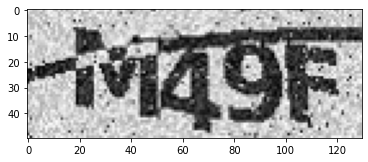

In [17]:

mode = 'nopre'
origin_X,origin_Y,origin_Y_onehot=predo.load_data()

print ("origin_X shape:",origin_X.shape)
print ("origin_X[0]",origin_X[0])
print ("origin_X[0] shape:",origin_X[0].shape)

if mode == 'nopre': resize_x=predo.resize_img(origin_X,True,False)
elif mode == 'dn1': resize_x=predo.load_data_denoise_train2()
elif mode == 'dn2': resize_x=predo.load_data_denoise_train()
    
print ("resize_x shape:",resize_x.shape)
print ("resize_x[0] shape:",resize_x[0].shape)

img = Image.fromarray(resize_x[1234])
plt.imshow(img)
plt.show()


In [18]:

BATCH_SIZE = 256
NUM_EPOCHS = 200 #change to 100

#WEIGHTS_FINAL = 'model-cat-final2.h5'

In [19]:
 
train_rate=0.9 #change to 0.9
num_train_data=int(5000*train_rate)

train_x_orig=resize_x.reshape(5000,50,130,-1)[0:num_train_data]
test_x_orig=resize_x.reshape(5000,50,130,-1)[num_train_data:]
    
x_train=train_x_orig.astype('float32')/255
x_test=test_x_orig.astype('float32')/255

print ("x_train shape: "+str(x_train.shape))
print ("x_test shape: "+str(x_test.shape))

y_train_onehot=origin_Y_onehot[0:num_train_data]
y_test_onehot=origin_Y_onehot[num_train_data:]

print ("y_train_onehot shape: "+str(y_train_onehot.shape))
print ("y_test_onehot shape: "+str(y_test_onehot.shape))

x_train shape: (4500, 50, 130, 3)
x_test shape: (500, 50, 130, 3)
y_train_onehot shape: (4500, 4, 19)
y_test_onehot shape: (500, 4, 19)


In [20]:

def model(input_shape):
    X_input = Input(input_shape)
        
#--------------------------------W1--------------------------------------------
    
    W1 = Conv2D(64, (5, 5), strides = (1, 1), activation = 'relu', padding='same', name = 'conv11_W1')(X_input)
    #W1 = Conv2D(64, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv12_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool1_W1')(W1)
    
    W1 = Conv2D(128, (5, 5), strides = (1, 1), activation = 'relu', padding='same', name = 'conv23_W1')(W1)
    #W1 = Conv2D(128, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv24_W1')(W1)
    W1 = Conv2D(128, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv25_W1')(W1)
    
    W1 = BatchNormalization(axis = 3, name = 'bn1_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool2_W1')(W1)
    
    #W1 = Conv2D(256, (1, 1), strides = (1, 1), activation = 'relu', padding='same', name = 'conv36_W1')(W1)
    #W1 = Conv2D(256, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv37_W1')(W1)   
    #W1 = Conv2D(256, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv38_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool3_W1')(W1)
    
    #W1 = Conv2D(512, (3, 3), strides = (1, 1), activation = 'relu', padding='same', name = 'conv49_W1')(W1)
    #W1 = Conv2D(512, (1, 1), strides = (1, 1), activation = 'relu', name = 'conv410_W1')(W1)
    #W1 = BatchNormalization(axis = 3, name = 'bn2_W1')(W1)
    W1 = MaxPooling2D((2, 2), name='max_pool4_W1')(W1)

    W1 = Flatten()(W1)
    W1 = Dropout(0.5)(W1)
    
    D1 = Dense(128, activation='relu', name='fc11_W1')(W1)
    #D1 = Dropout(0.25)(D1)    
    #D1 = Dense(128, activation='relu', name='fc12_W1')(D1)    
    D1 = Dense(19, activation='softmax', name='fc13_W1')(D1)
    
    D2 = Dense(128, activation='relu', name='fc11_W2')(W1)
    #D2 = Dropout(0.25)(D2)
    #D2 = Dense(128, activation='relu', name='fc12_W2')(D2)    
    D2 = Dense(19, activation='softmax', name='fc13_W2')(D2)
    
    D3 = Dense(128, activation='relu', name='fc11_W3')(W1)
    #D3 = Dropout(0.25)(D3)
    #D3 = Dense(128, activation='relu', name='fc12_W3')(D3)    
    D3 = Dense(19, activation='softmax', name='fc13_W3')(D3)
    
    D4 = Dense(128, activation='relu', name='fc11_W4')(W1)
    #D4 = Dropout(0.25)(D4)    
    #D4 = Dense(128, activation='relu', name='fc12_W4')(D4)    
    D4 = Dense(19, activation='softmax', name='fc13_W4')(D4)
            
    model = Model(inputs = X_input, outputs = [D1, D2, D3, D4],name='test')
    return model

In [21]:
# training
if not os.path.isdir('model_history_save'):
    os.mkdir('model_history_save')
    
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# early_stopping : val_loss 連續不降低時，結束訓練
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True,mode='auto')
# reduce_lr : val_loss 連續不降低時，減少learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, verbose=1, mode='auto',
                            epsilon=0.0001, cooldown=0, min_lr=0)

checkpoint = ModelCheckpoint("model_history_save/best_model_weights.{epoch:02d}_{val_loss:.2f}.h5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

if mode == 'nopre': test=model((50,130,3))
else: test=model((50,130,1))

test.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=test.fit(x=x_train,y={"fc13_W1":y_train_onehot[:,0,:],"fc13_W2":y_train_onehot[:,1,:],"fc13_W3":y_train_onehot[:,2,:],"fc13_W4":y_train_onehot[:,3,:]},
                        validation_split=0.2, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,verbose=1, callbacks=[early_stopping,checkpoint,reduce_lr])


Train on 3600 samples, validate on 900 samples
Epoch 1/200
3600/3600 [==============================] - 150s 42ms/step - loss: 13.5159 - fc13_W1_loss: 3.4996 - fc13_W2_loss: 3.3230 - fc13_W3_loss: 3.3459 - fc13_W4_loss: 3.3473 - fc13_W1_acc: 0.0522 - fc13_W2_acc: 0.0553 - fc13_W3_acc: 0.0622 - fc13_W4_acc: 0.0597 - val_loss: 35.4893 - val_fc13_W1_loss: 8.4543 - val_fc13_W2_loss: 11.5330 - val_fc13_W3_loss: 8.6218 - val_fc13_W4_loss: 6.8801 - val_fc13_W1_acc: 0.0444 - val_fc13_W2_acc: 0.0556 - val_fc13_W3_acc: 0.0522 - val_fc13_W4_acc: 0.0489

Epoch 00001: val_loss improved from inf to 35.48929, saving model to model_history_save/best_model_weights.01_35.49.h5
Epoch 2/200
3600/3600 [==============================] - 174s 48ms/step - loss: 11.7251 - fc13_W1_loss: 2.9396 - fc13_W2_loss: 2.9398 - fc13_W3_loss: 2.9207 - fc13_W4_loss: 2.9251 - fc13_W1_acc: 0.0594 - fc13_W2_acc: 0.0725 - fc13_W3_acc: 0.0739 - fc13_W4_acc: 0.0772 - val_loss: 11.9844 - val_fc13_W1_loss: 3.0035 - val_fc13_W2_los

3600/3600 [==============================] - 173s 48ms/step - loss: 3.3241 - fc13_W1_loss: 0.8444 - fc13_W2_loss: 0.9206 - fc13_W3_loss: 0.7785 - fc13_W4_loss: 0.7807 - fc13_W1_acc: 0.6942 - fc13_W2_acc: 0.6844 - fc13_W3_acc: 0.7433 - fc13_W4_acc: 0.7467 - val_loss: 7.8176 - val_fc13_W1_loss: 1.9330 - val_fc13_W2_loss: 1.9329 - val_fc13_W3_loss: 1.9831 - val_fc13_W4_loss: 1.9686 - val_fc13_W1_acc: 0.3956 - val_fc13_W2_acc: 0.4400 - val_fc13_W3_acc: 0.4911 - val_fc13_W4_acc: 0.3956

Epoch 00015: val_loss improved from 9.74069 to 7.81762, saving model to model_history_save/best_model_weights.15_7.82.h5
Epoch 16/200
3600/3600 [==============================] - 174s 48ms/step - loss: 2.8106 - fc13_W1_loss: 0.7408 - fc13_W2_loss: 0.7906 - fc13_W3_loss: 0.6129 - fc13_W4_loss: 0.6664 - fc13_W1_acc: 0.7319 - fc13_W2_acc: 0.7319 - fc13_W3_acc: 0.8017 - fc13_W4_acc: 0.7889 - val_loss: 11.4162 - val_fc13_W1_loss: 2.9077 - val_fc13_W2_loss: 2.7738 - val_fc13_W3_loss: 2.9494 - val_fc13_W4_loss: 2.7


Epoch 00028: val_loss did not improve from 0.69237
Epoch 29/200
3600/3600 [==============================] - 173s 48ms/step - loss: 0.7630 - fc13_W1_loss: 0.2421 - fc13_W2_loss: 0.2123 - fc13_W3_loss: 0.1407 - fc13_W4_loss: 0.1680 - fc13_W1_acc: 0.9250 - fc13_W2_acc: 0.9328 - fc13_W3_acc: 0.9558 - fc13_W4_acc: 0.9478 - val_loss: 1.3738 - val_fc13_W1_loss: 0.3995 - val_fc13_W2_loss: 0.3667 - val_fc13_W3_loss: 0.3106 - val_fc13_W4_loss: 0.2970 - val_fc13_W1_acc: 0.8667 - val_fc13_W2_acc: 0.8900 - val_fc13_W3_acc: 0.8944 - val_fc13_W4_acc: 0.9022

Epoch 00029: val_loss did not improve from 0.69237
Epoch 30/200
3600/3600 [==============================] - 174s 48ms/step - loss: 0.7887 - fc13_W1_loss: 0.2315 - fc13_W2_loss: 0.2146 - fc13_W3_loss: 0.1716 - fc13_W4_loss: 0.1710 - fc13_W1_acc: 0.9289 - fc13_W2_acc: 0.9303 - fc13_W3_acc: 0.9433 - fc13_W4_acc: 0.9442 - val_loss: 0.5540 - val_fc13_W1_loss: 0.1626 - val_fc13_W2_loss: 0.1532 - val_fc13_W3_loss: 0.1141 - val_fc13_W4_loss: 0.1242 - 


Epoch 00042: val_loss did not improve from 0.29711
Epoch 43/200
3600/3600 [==============================] - 173s 48ms/step - loss: 0.3357 - fc13_W1_loss: 0.0966 - fc13_W2_loss: 0.0886 - fc13_W3_loss: 0.0694 - fc13_W4_loss: 0.0811 - fc13_W1_acc: 0.9681 - fc13_W2_acc: 0.9739 - fc13_W3_acc: 0.9753 - fc13_W4_acc: 0.9739 - val_loss: 0.3825 - val_fc13_W1_loss: 0.1317 - val_fc13_W2_loss: 0.1161 - val_fc13_W3_loss: 0.0751 - val_fc13_W4_loss: 0.0596 - val_fc13_W1_acc: 0.9667 - val_fc13_W2_acc: 0.9700 - val_fc13_W3_acc: 0.9833 - val_fc13_W4_acc: 0.9844

Epoch 00043: val_loss did not improve from 0.29711
Epoch 44/200
3600/3600 [==============================] - 173s 48ms/step - loss: 0.2987 - fc13_W1_loss: 0.0959 - fc13_W2_loss: 0.0800 - fc13_W3_loss: 0.0675 - fc13_W4_loss: 0.0553 - fc13_W1_acc: 0.9689 - fc13_W2_acc: 0.9753 - fc13_W3_acc: 0.9767 - fc13_W4_acc: 0.9858 - val_loss: 0.3160 - val_fc13_W1_loss: 0.1178 - val_fc13_W2_loss: 0.0880 - val_fc13_W3_loss: 0.0610 - val_fc13_W4_loss: 0.0492 - 

3600/3600 [==============================] - 172s 48ms/step - loss: 0.1689 - fc13_W1_loss: 0.0482 - fc13_W2_loss: 0.0504 - fc13_W3_loss: 0.0313 - fc13_W4_loss: 0.0390 - fc13_W1_acc: 0.9861 - fc13_W2_acc: 0.9853 - fc13_W3_acc: 0.9908 - fc13_W4_acc: 0.9867 - val_loss: 0.2437 - val_fc13_W1_loss: 0.0981 - val_fc13_W2_loss: 0.0754 - val_fc13_W3_loss: 0.0385 - val_fc13_W4_loss: 0.0317 - val_fc13_W1_acc: 0.9778 - val_fc13_W2_acc: 0.9800 - val_fc13_W3_acc: 0.9922 - val_fc13_W4_acc: 0.9911

Epoch 00057: val_loss did not improve from 0.23561
Epoch 58/200
3600/3600 [==============================] - 173s 48ms/step - loss: 0.1587 - fc13_W1_loss: 0.0490 - fc13_W2_loss: 0.0468 - fc13_W3_loss: 0.0274 - fc13_W4_loss: 0.0355 - fc13_W1_acc: 0.9847 - fc13_W2_acc: 0.9881 - fc13_W3_acc: 0.9919 - fc13_W4_acc: 0.9900 - val_loss: 0.2376 - val_fc13_W1_loss: 0.1049 - val_fc13_W2_loss: 0.0679 - val_fc13_W3_loss: 0.0355 - val_fc13_W4_loss: 0.0292 - val_fc13_W1_acc: 0.9733 - val_fc13_W2_acc: 0.9856 - val_fc13_W3_a


Epoch 00071: val_loss did not improve from 0.22400

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
Epoch 72/200
3600/3600 [==============================] - 175s 49ms/step - loss: 0.1189 - fc13_W1_loss: 0.0337 - fc13_W2_loss: 0.0367 - fc13_W3_loss: 0.0230 - fc13_W4_loss: 0.0254 - fc13_W1_acc: 0.9878 - fc13_W2_acc: 0.9911 - fc13_W3_acc: 0.9919 - fc13_W4_acc: 0.9908 - val_loss: 0.2424 - val_fc13_W1_loss: 0.0930 - val_fc13_W2_loss: 0.0730 - val_fc13_W3_loss: 0.0370 - val_fc13_W4_loss: 0.0393 - val_fc13_W1_acc: 0.9811 - val_fc13_W2_acc: 0.9856 - val_fc13_W3_acc: 0.9900 - val_fc13_W4_acc: 0.9889

Epoch 00072: val_loss did not improve from 0.22400
Epoch 73/200
3600/3600 [==============================] - 173s 48ms/step - loss: 0.1087 - fc13_W1_loss: 0.0342 - fc13_W2_loss: 0.0328 - fc13_W3_loss: 0.0185 - fc13_W4_loss: 0.0233 - fc13_W1_acc: 0.9928 - fc13_W2_acc: 0.9908 - fc13_W3_acc: 0.9953 - fc13_W4_acc: 0.9922 - val_loss: 0.2252 - val_fc13_W1_loss: 0.0886 -

3600/3600 [==============================] - 177s 49ms/step - loss: 0.0977 - fc13_W1_loss: 0.0308 - fc13_W2_loss: 0.0261 - fc13_W3_loss: 0.0214 - fc13_W4_loss: 0.0195 - fc13_W1_acc: 0.9894 - fc13_W2_acc: 0.9933 - fc13_W3_acc: 0.9944 - fc13_W4_acc: 0.9944 - val_loss: 0.2292 - val_fc13_W1_loss: 0.0942 - val_fc13_W2_loss: 0.0653 - val_fc13_W3_loss: 0.0321 - val_fc13_W4_loss: 0.0376 - val_fc13_W1_acc: 0.9811 - val_fc13_W2_acc: 0.9878 - val_fc13_W3_acc: 0.9922 - val_fc13_W4_acc: 0.9900

Epoch 00086: val_loss did not improve from 0.21597
Epoch 87/200
3600/3600 [==============================] - 187s 52ms/step - loss: 0.0926 - fc13_W1_loss: 0.0274 - fc13_W2_loss: 0.0309 - fc13_W3_loss: 0.0162 - fc13_W4_loss: 0.0181 - fc13_W1_acc: 0.9925 - fc13_W2_acc: 0.9931 - fc13_W3_acc: 0.9947 - fc13_W4_acc: 0.9947 - val_loss: 0.2129 - val_fc13_W1_loss: 0.0865 - val_fc13_W2_loss: 0.0637 - val_fc13_W3_loss: 0.0317 - val_fc13_W4_loss: 0.0310 - val_fc13_W1_acc: 0.9822 - val_fc13_W2_acc: 0.9889 - val_fc13_W3_a

In [11]:
#info
print(test.summary()) 
test_weights = np.array(test.get_weights(),dtype=object)

# weight shape
'''
print('weights shape :',test_weights.shape)
for i in range (0,test_weights.shape[0],2):
    print('weights 0 shape :',test_weights[i].shape)
    print('bias 0 shape :',test_weights[i+1].shape)  
'''

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50, 130, 3)   0                                            
__________________________________________________________________________________________________
conv11_W1 (Conv2D)              (None, 50, 130, 64)  4864        input_2[0][0]                    
__________________________________________________________________________________________________
max_pool1_W1 (MaxPooling2D)     (None, 25, 65, 64)   0           conv11_W1[0][0]                  
__________________________________________________________________________________________________
conv23_W1 (Conv2D)              (None, 25, 65, 128)  204928      max_pool1_W1[0][0]               
__________________________________________________________________________________________________
conv25_W1 

"\nprint('weights shape :',test_weights.shape)\nfor i in range (0,test_weights.shape[0],2):\n    print('weights 0 shape :',test_weights[i].shape)\n    print('bias 0 shape :',test_weights[i+1].shape)  \n"

In [12]:
#evaluate
scores=test.evaluate(x_test, {"fc13_W1":y_test_onehot[:,0,:],"fc13_W2":y_test_onehot[:,1,:],"fc13_W3":y_test_onehot[:,2,:],"fc13_W4":y_test_onehot[:,3,:]}, verbose=0)  
print('Test W1 loss:', scores[1],' Test W1 accuracy:', scores[5])
print('Test W2 loss:', scores[2],' Test W2 accuracy:', scores[6])
print('Test W3 loss:', scores[3],' Test W3 accuracy:', scores[7])
print('Test W4 loss:', scores[4],' Test W4 accuracy:', scores[8])

#儲存history
np.save(mode+'_weights_'+str(complete_time)+'_history.npy',train_history.history)



Test W1 loss: 0.07709530081599951  Test W1 accuracy: 0.984
Test W2 loss: 0.07274479222670198  Test W2 accuracy: 0.986
Test W3 loss: 0.026128847817191853  Test W3 accuracy: 0.99
Test W4 loss: 0.06474165044724942  Test W4 accuracy: 0.984


In [13]:
#train_history keys
#讀取history
cur_history=np.load(mode+'_weights_'+str(complete_time)+'_history.npy',allow_pickle='TRUE').item()
#cur_history=np.load('nopre_weights_2021_10_19 01_44_22_history.npy',allow_pickle='TRUE').item()
print (cur_history.keys())


dict_keys(['val_loss', 'val_fc13_W1_loss', 'val_fc13_W2_loss', 'val_fc13_W3_loss', 'val_fc13_W4_loss', 'val_fc13_W1_acc', 'val_fc13_W2_acc', 'val_fc13_W3_acc', 'val_fc13_W4_acc', 'loss', 'fc13_W1_loss', 'fc13_W2_loss', 'fc13_W3_loss', 'fc13_W4_loss', 'fc13_W1_acc', 'fc13_W2_acc', 'fc13_W3_acc', 'fc13_W4_acc', 'lr'])


In [14]:
#save weights

complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 

test.save(mode+'_test_'+str(complete_time)+'.h5')
#test.save_weights(mode+'_weights_'+str(complete_time)+'.h5')

#model.save(WEIGHTS_FINAL) 

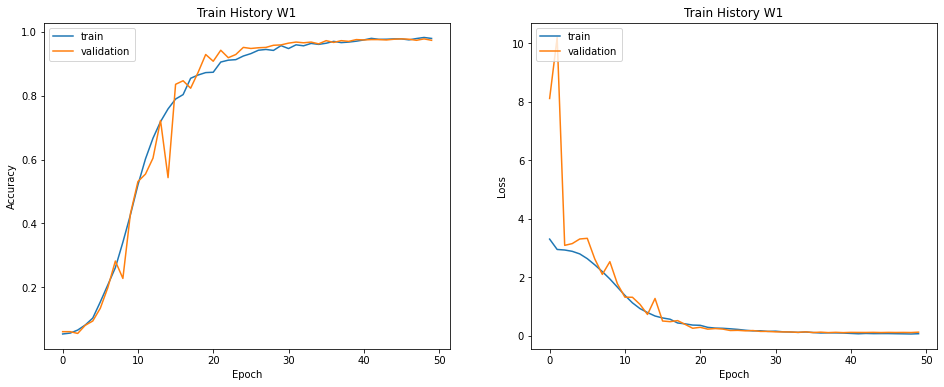

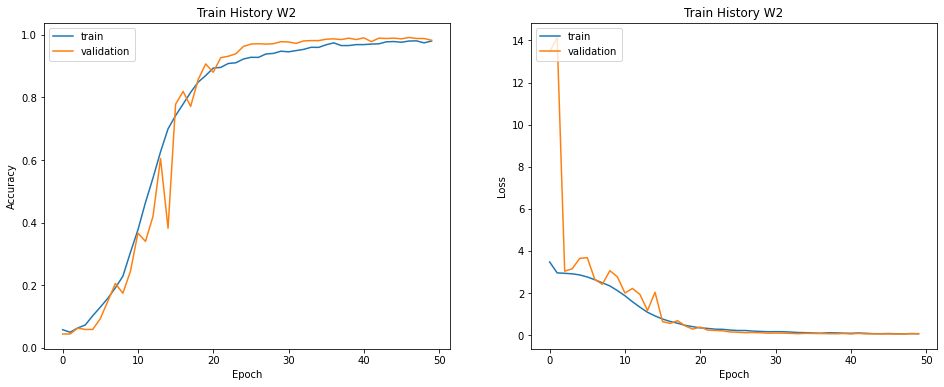

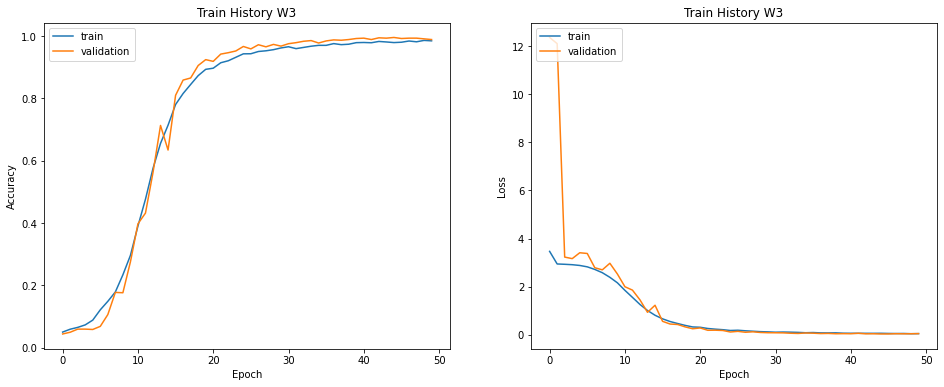

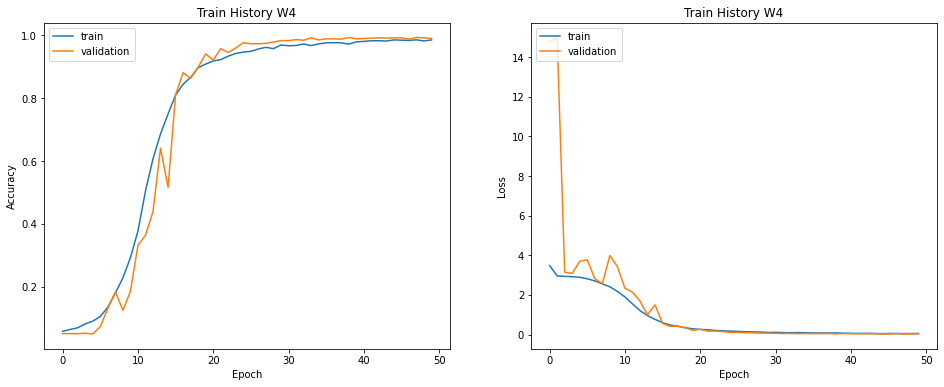

In [15]:
#plot

def show_train_history(cur_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W1_acc"])
    plt.plot(cur_history["val_fc13_W1_acc"])
    plt.title("Train History W1")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W1_loss"])
    plt.plot(cur_history["val_fc13_W1_loss"])
    plt.title("Train History W1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W1.png")
    plt.show()
    
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W2_acc"])
    plt.plot(cur_history["val_fc13_W2_acc"])
    plt.title("Train History W2")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W2_loss"])
    plt.plot(cur_history["val_fc13_W2_loss"])
    plt.title("Train History W2")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W2.png")
    plt.show()
    
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W3_acc"])
    plt.plot(cur_history["val_fc13_W3_acc"])
    plt.title("Train History W3")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W3_loss"])
    plt.plot(cur_history["val_fc13_W3_loss"])
    plt.title("Train History W3")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W3.png")
    plt.show()
    
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(cur_history["fc13_W4_acc"])
    plt.plot(cur_history["val_fc13_W4_acc"])
    plt.title("Train History W4")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(cur_history["fc13_W4_loss"])
    plt.plot(cur_history["val_fc13_W4_loss"])
    plt.title("Train History W4")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig('result/'+mode+"W4.png")
    plt.show()
    
    
    
show_train_history(cur_history) 